In [16]:
import json
import sys

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

In [86]:
factory = PokemonFactory("pokemon.json")
df = pd.read_json("pokemon.json")
pokemons = list(df.columns)
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

['jolteon', 'caterpie', 'snorlax', 'onix', 'mewtwo']


In [79]:
def estimate_catchrate(pokemon_instance, pokeball, noise, n):
    return np.average([attempt_catch(pokemon_instance, pokeball, noise)[0] for _ in range(n)])

## a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

In [99]:
results = {}
for ball in pokeballs:
    ball_rates = {}
    for pokemon in pokemons:
        bicho = factory.create(pokemon, 100, StatusEffect.NONE, 1)
        ball_rates[pokemon] = estimate_catchrate(bicho, ball, 0, 3000)
    # print(f"Ball type: {ball}, Success Rate: {np.average(ball_rates)}")
    results[ball] = ball_rates
dataframe = pd.DataFrame.from_dict(results)
fig = px.bar(x=list(results.keys()), y=list(map(lambda v: np.average(list(v.values())), results.values())), title="Average capture probability by Pokeball")

{'pokeball': {'jolteon': 0.06233333333333333, 'caterpie': 0.35033333333333333, 'snorlax': 0.033, 'onix': 0.06066666666666667, 'mewtwo': 0.004333333333333333}, 'ultraball': {'jolteon': 0.12333333333333334, 'caterpie': 0.678, 'snorlax': 0.068, 'onix': 0.11566666666666667, 'mewtwo': 0.007666666666666666}, 'fastball': {'jolteon': 0.23066666666666666, 'caterpie': 0.33266666666666667, 'snorlax': 0.033, 'onix': 0.056666666666666664, 'mewtwo': 0.015333333333333332}, 'heavyball': {'jolteon': 0.04033333333333333, 'caterpie': 0.31366666666666665, 'snorlax': 0.09, 'onix': 0.08366666666666667, 'mewtwo': 0.0}}


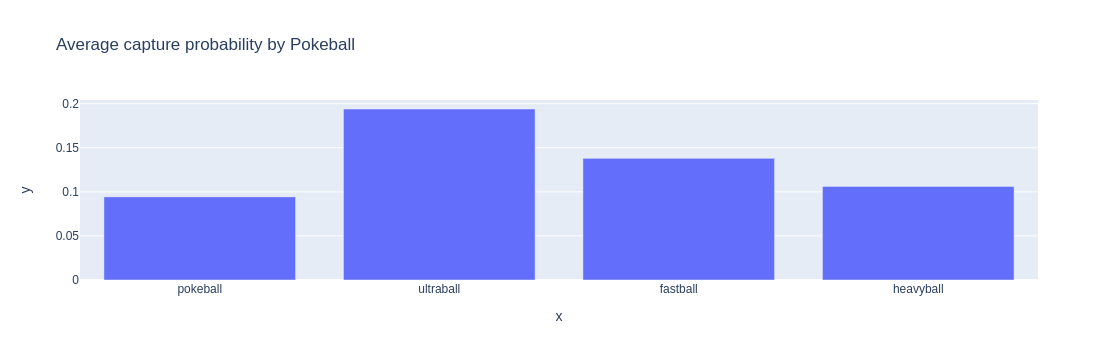

In [81]:
fig.show()

## 1b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrinsecas de cada Pokemon? Justificar.
Asumiendo que las variantes de las pokebolas son simplemente variaciones de la pokebola base con diferentes efectividades, efectividad fastball / efectividad pokeball deberia mantenerse igual para todos los pokemons

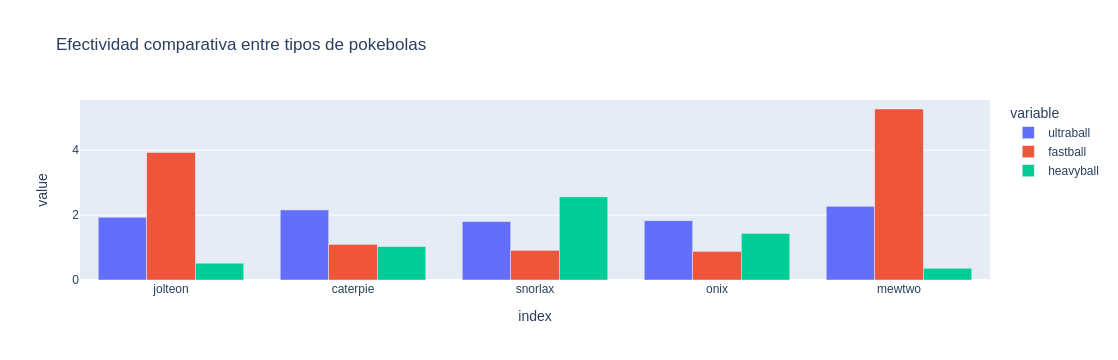

In [82]:
from itertools import islice
result2 = {}
base_pokeball = results["pokeball"]
for (pokeball, pokemons) in islice(results.items(), 1, None):
    result2[pokeball] = { pokemon: catchrate / base_pokeball[pokemon] for (pokemon, catchrate) in pokemons.items() }

fig2 = px.bar(result2, title="Efectividad comparativa entre tipos de pokebolas", barmode='group')
fig2.show()

Podemos ver desde el grafico que algunos tipos pokebolas son (en comparacion a la pokebola base)
mas efectivas en ciertos pokemons, por ejemplo las fastball en mewtwo, la heavyball en snorlax

## 2a)¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es ası́, ¿Cuál es más o menos efectiva?

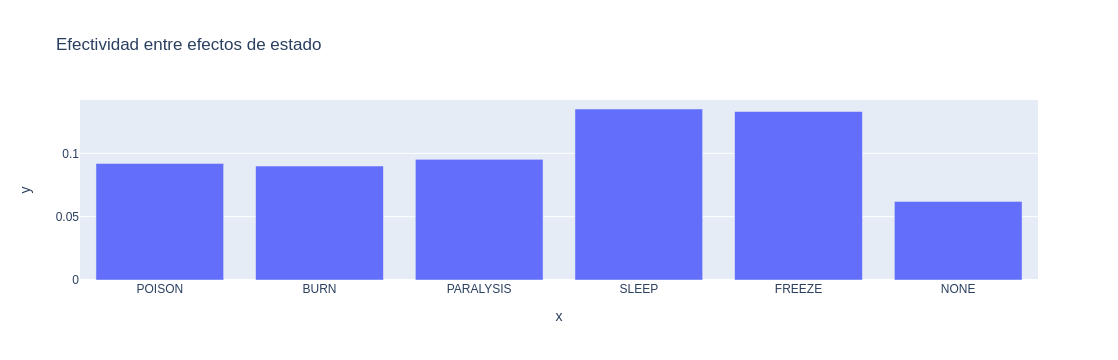

In [102]:
pokemon_test = df.columns[0]
variants = { status: factory.create(pokemon_test, 100, status, 1) for status in StatusEffect }
catchrate_by_variant = { status: estimate_catchrate(pokemon, pokeballs[0], 1, 3000) for (status, pokemon) in variants.items() }


fig3 = px.bar(x = list(map(lambda status : status.name, catchrate_by_variant.keys())), y = list(catchrate_by_variant.values()), title = "Efectividad entre efectos de estado")
fig3.show()

Podemos ver que los mas efectivos son SLEEP y FREEZE.

In [ ]:
# 2d) Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?
# 2e) A partir del punto anterior, ¿serı́a efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?

## 2b) ¿Cómo afectan los puntos de vida a la efectividad de la captura? Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos HP %

In [116]:
import decimal

def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

health_vars = { percentage: factory.create(pokemon_test, 50, StatusEffect.NONE, percentage) for percentage in drange(0, 1, 0.05) }
catchrate_by_variant = { percentage: estimate_catchrate(pokemon, pokeballs[0], 1, 8000) for (percentage, pokemon) in health_vars.items() }

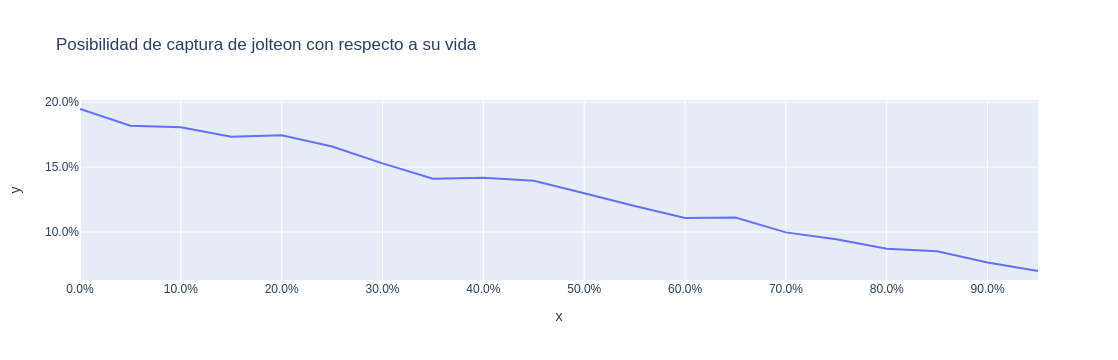

In [129]:
fig4 = px.line(x = catchrate_by_variant.keys(), y = catchrate_by_variant.values(), title = f"Posibilidad de captura de {pokemon_test} con respecto a su vida")
fig4.update_xaxes(tickformat=".1%")
fig4.update_yaxes(tickformat=".1%")
fig4.show()

Podemos ver que a medida a mayor vida menos posibilidad de captura

# 2c) ¿Qué parámetros son los que más afectan la probabilidad de captura?